# Optimizing rho and l2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn

In [44]:
# Experiments with rho, with fixed normalization strength

data = esn.Data.create_source('lorenz')

points_to_skip = 300
training_signal_length = 10000
test_length = 500
n_units = 100
n_edges = 500
n_experiments = 10

rhos = [None, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]

loss_train = np.zeros((len(rhos), n_experiments))
loss_test = np.zeros((len(rhos), n_experiments))
seeds = np.random.uniform(size=n_experiments)

for i_rho,rho in enumerate(rhos):
    for i_exp in range(n_experiments):
        x1,y1 = data.generate(points_to_skip + training_signal_length, sampling_step=0.02, seed=seeds[i_exp])
        x2,y2 = data.generate(points_to_skip + training_signal_length, sampling_step=0.02, seed=1)

        model = esn.Reservoir(n_units, n_edges=n_edges, rho=rho, network_type='erdos', l2=0.01)       
        model.fit(x1, y1, skip=points_to_skip)

        # Training data loss    
        z = model.predict(x1, length=points_to_skip+test_length)     
        loss_train[i_rho, i_exp] = esn.utils.loss(y1[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])        

        # Testing loss        
        z = model.predict(x2, length=points_to_skip+test_length)     
        loss_test[i_rho, i_exp] = esn.utils.loss(y2[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
        print('.', end='')
    print('|', end='')
print('Done')

..........|..........|..........|..........|..........|..........|..........|..........|Done


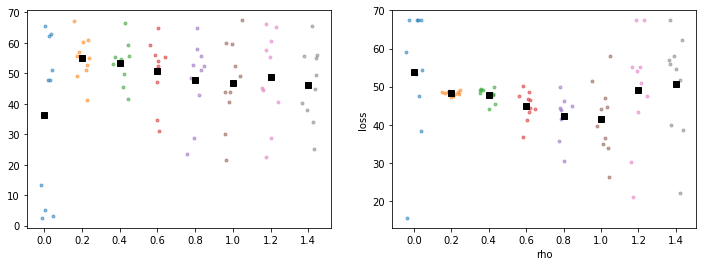

In [45]:
def niceplot(x, y):    
    x = np.array(x)
    step = min(x[1:]-x[:-1])*0.5/2 # Minimal distance between x alements
    for i,xtick in enumerate(x):
        plt.plot(xtick + np.random.uniform(size=y.shape[1])*2*step - step, y[i,:], '.', alpha=0.5)
        plt.plot(xtick, np.mean(y[i,:]), 'sk')
        
groups = [a if a is not None else 0 for a in rhos]
plt.figure(figsize=(12,4))
plt.subplot(121)
niceplot(groups, loss_train)
plt.subplot(122)
niceplot(groups, np.minimum(loss_test, np.max(loss_train)))
plt.xlabel('rho');
plt.ylabel('loss');

### Observations for N=100, E=200, Erdos

* No regularization:
 * Optimum of ~30 achieved at ρ=0.2-0.4
 * Testing loss < training loss
* Regularization 0.001:
 * Optimum at ρ=1
 * Higher loss (about 40)
* Regularization 0.01:
 * Much higher loss (about 50)
 * Optimum at ρ~0.8
 * Testing loss still lower than training loss
* l2=0.001, but E=300 
 * Very similar pic, similar optimal rho, but loss much lower (for l2=0.001, from 50 moved to 35)
* l2=0.001, but E=500 
 * Very similar to previous one.
* l2=0.01, E=500
 * Similar pattern, but higher loss (40 instead of 35).
 


### Observations for N=100, E=200, WS

* No regularization:
 * With no regularization, loss is minimal for ρ=0.6 (about 40). Round 60 boh for extremely low and high ρ.
 * When ρ is not rescaled (set to None), for training data, some near=0 losses are achievable. But for testing data they explode. Extreme overfitting?
* Regularizatoin 0.0001
 * Optimum of ~40 (so similar to no regularization), but at rho=1.0 (so more similar to 0.01).
 * Testing loss substantially lower than training loss (~60) 🤔
* Regularization 0.01:
 * Loss is actually higher, with minimum of about 4 achieved for ρ of 1.2.
 * Same pattern for "free rho": great training loss, horrible testing.
* Regularizatoin 0.02:
 * near-constant loss of ~50. Obviously, signal is just suppressed at this point.

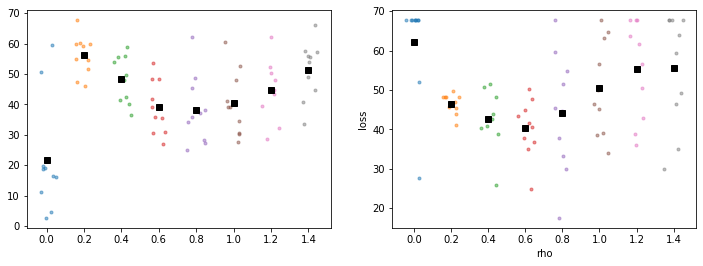

In [17]:
def niceplot(x, y):    
    x = np.array(x)
    step = min(x[1:]-x[:-1])*0.5/2 # Minimal distance between x alements
    for i,xtick in enumerate(x):
        plt.plot(xtick + np.random.uniform(size=y.shape[1])*2*step - step, y[i,:], '.', alpha=0.5)
        plt.plot(xtick, np.mean(y[i,:]), 'sk')
        
groups = [a if a is not None else 0 for a in rhos]
plt.figure(figsize=(12,4))
plt.subplot(121)
niceplot(groups, loss_train)
plt.subplot(122)
niceplot(groups, np.minimum(loss_test, np.max(loss_train)))
plt.xlabel('rho');
plt.ylabel('loss');